In [1]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\PlateReaderTools'
os.chdir(base_dir) 

#import sys
from core import plate_reader_tools 
import pandas as pd
import numpy as np
# import math
# import matplotlib
import matplotlib.pyplot as plt
import string
import seaborn as sns

# import os
# import sys

# path = '/Users/andrewng/Documents/PlateReaderTools'
# if not path in sys.path:
#     sys.path.insert(1, path)
# del path

# from plate_reader_tools import *
# import seaborn as sns
# sns.set_style("white")
# sns.set_style("ticks")

%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%matplotlib inline

In [2]:
dirname = "C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\WetLab\Plate_reader\\"
fname = dirname + "20170316_BMH_24h_20170317_150316.xlsx"
#date = fname[-13:-5]
sheetname = 'Result sheet'
skiprows = 48
rows = 8
columns = 12
datalabels = ['OD'] 
cycles = 96
horz = 0


In [3]:
[d,time_list] = plate_reader_tools.readplate(fname,sheetname, skiprows, rows, columns, datalabels, cycles, horz)
OD_data = d['OD']


In [4]:
#Plot all wells in an array similar to the plate. 
letter_range = ['A','B','C','D','E','F','G','H']
number_range = range(1,13)
well_arr = plate_reader_tools.well_array_builder(letter_range,number_range)
fig = plate_reader_tools.subplot_array(OD_data, well_arr, time_list)

In [4]:
#Build Multiindex dataframe to compare different conditions.  
layer_names = ['Strain', 'Condition','Tech_Rep']
conditions = ['no drug','3uM 1-NM-PP1']
strains = ['KL_WT_13a', 'KL_1rep_29', 'KL_2rep(AS)_55', 'KL_2rep_74','KL_2rep(as)_78-3', 'SC_WT_5-41','SC_AS_33','SC_AS_35(IRFP)','SC_1rep_49','SC_1rep(AS)_50','SC_2rep_51','SC_2rep(AS)_52']
tech_reps = ['TR1','TR2','TR3','TR4']      
experiment_setup = [strains, conditions, tech_reps]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
#Remove missing conditions from data - need to do this if e.g. you don't have the same number of replicates as conditions 

#for 1-NM-PP1 there is only 3 tech reps. 
conditions_missing_rep = ['3uM 1-NM-PP1']
Ncond = len(conditions)
Ntech_reps = len(tech_reps)
#missing_conditions_indices = [jj*8 - 1 for jj in range(1,13)]
missing_cond_inds_condlist = [conditions.index(cond) for cond in conditions_missing_rep]
missing_conditions_indices = []
for ind in missing_cond_inds_condlist:
    for jj in range(1,len(strains)+1):
        missing_conditions_indices.append(jj*(Ncond*Ntech_reps) - (len(conditions)-1-ind)*Ntech_reps - 1)


data_index_adjusted = data_index.set_labels([np.delete(label_level,[missing_conditions_indices]) for label_level in data_index.labels])

#data_index_adjusted

#Data goes in order: (strain[0],biol_rep[0],tech_rep[0]), (strain[0],biol_rep[0],tech_rep[1]), (strain[0],biol_rep[1],tech_rep[0]), (strain[0],biol_rep[1],tech_rep[1]), ...

# #Remove other 
wells = ['A1','B2','C3','D4','E1','F2','G3',
         'A2','B3','C4','D5','E2','F3','G4',
         'A3','B4','C5','D6','E3','F4','G5',
         'A4','B5','C6','D7','E4','F5','G6',
         'A5','B6','C7','D8','E5','F6','G7',
         'A6','B7','C8','D9','E6','F7','G8',
         'A7','B8','C9','D10','E7','F8','G9',
         'A8','B9','C10','D11','E8','F9','G10',
         'A9','B10','C11','D12','E9','F10','G11',
         'A10','B11','C12','D1','E10','F11','G12',
         'A11','B12','C1','D2','E11','F12','G1',
         'A12','B1','C2','D3','E12','F1','G2']
         
blank = np.mean(OD_data['H3'])
growth_data = [OD_data[well]-blank for well in wells ]
growth_data_df = pd.DataFrame(growth_data, index=data_index_adjusted)

growth_data_df
# #growth_data_df.sort_index(inplace = True)

0         1         2   \
Strain           Condition    Tech_Rep                                 
KL_WT_13a        no drug      TR1       0.055731  0.075231  0.095431   
                              TR2       0.006331  0.007231  0.008631   
                              TR3       0.005531  0.006531  0.007931   
                              TR4       0.005331  0.006931  0.009231   
                 3uM 1-NM-PP1 TR1       0.012531  0.013331  0.015731   
                              TR2       0.006731  0.008231  0.011331   
                              TR3       0.004031  0.005231  0.006231   
KL_1rep_29       no drug      TR1       0.048031  0.069831  0.091631   
                              TR2       0.007431  0.010031  0.012331   
                              TR3       0.007031  0.008431  0.011031   
                              TR4       0.007931  0.010331  0.013431   
                 3uM 1-NM-PP1 TR1       0.015531  0.023831  0.028731   
                              TR2       0.009831  0.012231  0.015931   
                              TR3       0.006031  0.008231  0.010031   
KL_2rep(AS)_55   no drug      TR1       0.077431  0.108031  0.126231   
                              TR2       0.006131  0.007731  0.009531   
                              TR3       0.006231  0.006931  0.008731   
                              TR4       0.004431  0.005731  0.008231   
                 3uM 1-NM-PP1 TR1       0.009131  0.012131  0.015531   
                              TR2       0.006331  0.007731  0.010131   
                              TR3       0.006131  0.007031  0.008731   
KL_2rep_74       no drug      TR1       0.029531  0.042231  0.056531   
                              TR2       0.009131  0.011331  0.015231   
                              TR3       0.007031  0.008631  0.011431   
                              TR4       0.007831  0.010231  0.014331   
                 3uM 1-NM-PP1 TR1       0.018731  0.023231  0.031031   
                              TR2       0.009031  0.011831  0.016331   
                              TR3       0.006631  0.008231  0.010931   
KL_2rep(as)_78-3 no drug      TR1       0.053631  0.066831  0.079231   
                              TR2       0.006931  0.008131  0.010031   
...                                          ...       ...       ...   
SC_AS_35(IRFP)   3uM 1-NM-PP1 TR2       0.005931  0.009731  0.019631   
                              TR3       0.003831  0.005931  0.011431   
SC_1rep_49       no drug      TR1       0.057431  0.099031  0.170031   
                              TR2       0.006131  0.010631  0.022531   
                              TR3       0.005031  0.009131  0.019131   
                              TR4       0.006031  0.013131  0.029331   
                 3uM 1-NM-PP1 TR1       0.176531  0.203231  0.241731   
                              TR2       0.006331  0.010631  0.023031   
                              TR3       0.004931  0.008431  0.016331   
SC_1rep(AS)_50   no drug      TR1       0.040531  0.083831  0.166231   
                              TR2       0.006331  0.011431  0.023131   
                              TR3       0.004531  0.006531  0.013331   
                              TR4       0.004331  0.008831  0.014731   
                 3uM 1-NM-PP1 TR1       0.188731  0.253131  0.304431   
                              TR2       0.003131  0.005231  0.011031   
                              TR3       0.003131  0.004031  0.007431   
SC_2rep_51       no drug      TR1       0.017131  0.039531  0.086331   
                              TR2       0.007631  0.012131  0.025831   
                              TR3       0.003931  0.007431  0.014731   
                              TR4       0.010431  0.018731  0.034131   
                 3uM 1-NM-PP1 TR1       0.086431  0.127931  0.188131   
                              TR2       0.004031  0.004731  0.010531   
                              TR3       0.003131  0.004531  0.008131   
SC_2rep(AS)_52

<IPython.core.display.Javascript object>


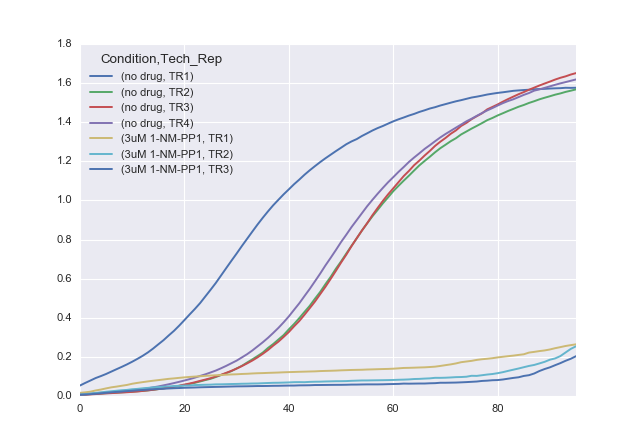

In [5]:
#Make an array of these plots - one for each KL strain, one for each SC strain
#Identify outliers
#Remove outliers and look foor differences between strains.

growth_data_df.loc[strains[4]].transpose().plot()

In [16]:
growth_data_df.loc[fig_strains[jj],conditions[0],['TR2','TR3','TR4']].transpose()

KeyError: 'MultiIndex Slicing requires the index to be fully lexsorted tuple len (3), lexsort depth (0)'

<IPython.core.display.Javascript object>


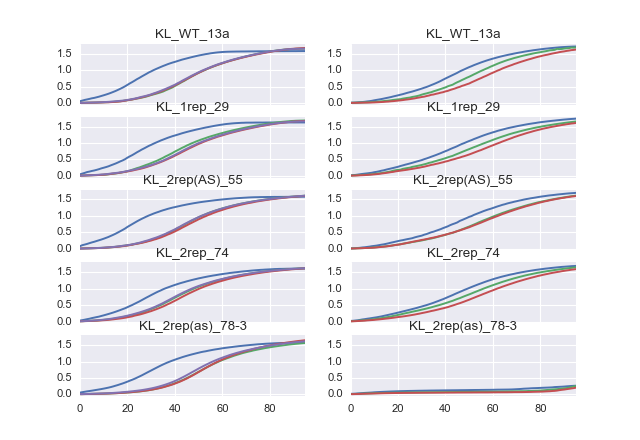

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.


In [13]:
fig_strains = ['KL_WT_13a', 'KL_1rep_29', 'KL_2rep(AS)_55', 'KL_2rep_74','KL_2rep(as)_78-3']
fig1, axarr = plt.subplots(len(fig_strains),2,sharex = True)

for jj in range(len(fig_strains)):
    strain = fig_strains[jj]
    for (kk,condition) in enumerate(conditions):
        strain_data = growth_data_df.loc[fig_strains[jj],condition].transpose()
        strain_data.plot(ax = axarr[jj,kk])
        ax = axarr[jj,kk]
        ax.set_title(strain)
        ax.set_ylim([-0.05,1.8])
        ax.legend_.remove()
        axarr[jj,kk] = ax

        
        
        
#     np.log(strain_data).plot(ax = axarr[jj,1])
#     ax = axarr[jj,1]
#     ax.set_title(strain)
#     ax.set_ylim([-5,2])
#     ax.legend_.remove()
#     axarr[jj,1] = ax


<IPython.core.display.Javascript object>


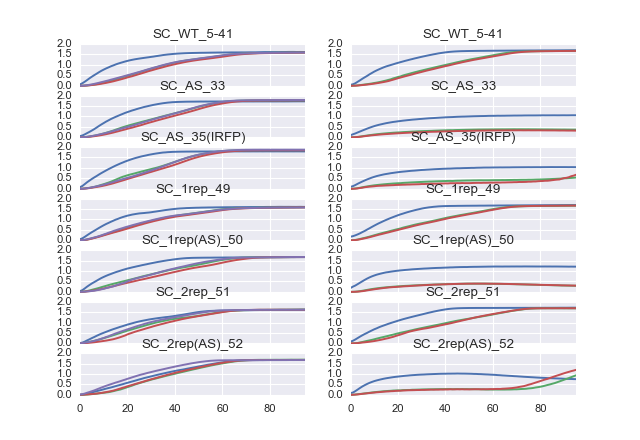

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.


In [15]:
fig_strains = ['SC_WT_5-41','SC_AS_33','SC_AS_35(IRFP)','SC_1rep_49','SC_1rep(AS)_50','SC_2rep_51','SC_2rep(AS)_52']
fig1, axarr = plt.subplots(len(fig_strains),2,sharex = True)

for jj in range(len(fig_strains)):
    strain = fig_strains[jj]
    for (kk,condition) in enumerate(conditions):
        strain_data = growth_data_df.loc[fig_strains[jj],condition].transpose()
        strain_data.plot(ax = axarr[jj,kk])
        ax = axarr[jj,kk]
        ax.set_title(strain)
        ax.set_ylim([-0.05,2.0])
        ax.legend_.remove()
        axarr[jj,kk] = ax


In [54]:
blank

1.2038416666666667

In [8]:
#Make into multi-dimensional object
#Plot on subplots by species. 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.1085,0.1008,0.1302,0.0823,0.1064,0.1226,0.1137,0.1359,0.1102,0.0933,...,0.0525,0.0519,0.0521,0.0516,0.0515,0.0517,0.052,0.0533,0.054,0.0527
1,0.128,0.1226,0.1608,0.095,0.1196,0.1785,0.1446,0.1928,0.1518,0.1366,...,0.0527,0.0525,0.0525,0.0518,0.0517,0.0518,0.0523,0.0527,0.0528,0.0543
2,0.1482,0.1444,0.179,0.1093,0.132,0.2508,0.1965,0.281,0.2228,0.219,...,0.0528,0.0526,0.0523,0.0519,0.0517,0.0519,0.0523,0.0528,0.0528,0.0535
3,0.1634,0.1695,0.1988,0.1249,0.1446,0.3305,0.2578,0.3719,0.2994,0.306,...,0.0528,0.0527,0.0524,0.0521,0.052,0.0522,0.0524,0.0532,0.0529,0.053
4,0.1798,0.1841,0.2223,0.1387,0.1546,0.4147,0.3167,0.451,0.3742,0.3837,...,0.0529,0.0526,0.0523,0.0519,0.0517,0.0519,0.0521,0.053,0.0527,0.0527
5,0.1975,0.2026,0.2447,0.1574,0.1654,0.4922,0.3809,0.5291,0.4466,0.4572,...,0.0528,0.0527,0.0523,0.052,0.0518,0.0521,0.0523,0.0531,0.0528,0.0527
6,0.2102,0.2175,0.2643,0.1724,0.1776,0.565,0.4475,0.6003,0.5124,0.5223,...,0.0527,0.0525,0.0523,0.0519,0.0517,0.052,0.0521,0.053,0.0527,0.0528
7,0.2285,0.2365,0.2876,0.1878,0.1898,0.6337,0.5222,0.6681,0.5802,0.5869,...,0.0527,0.0526,0.0521,0.0519,0.0517,0.0519,0.0522,0.053,0.0527,0.0528
8,0.2468,0.2574,0.3099,0.2021,0.2018,0.7057,0.599,0.7409,0.6498,0.6535,...,0.0526,0.0526,0.0523,0.0518,0.0516,0.0519,0.0522,0.0529,0.0526,0.0527
9,0.2689,0.2817,0.3325,0.2224,0.2144,0.7723,0.6703,0.8081,0.7146,0.716,...,0.0526,0.0525,0.0522,0.0517,0.0516,0.0518,0.0522,0.0529,0.0527,0.0527


In [67]:
#normalize fluorescence
OD = d['OD']
sfGFP = d['sfGFP']
mRFP = d['mRFP']

nGFP = pd.DataFrame(index = sfGFP.index.tolist(), columns = sfGFP.columns.tolist())
nRFP = pd.DataFrame(index = mRFP.index.tolist(), columns = mRFP.columns.tolist())

for i in range(len(sfGFP)):
    for j in range(len(sfGFP.iloc[i,:])):
        try: 
            nGFP.iloc[i,j] = sfGFP.iloc[i,j]/OD.iloc[i,j]
        except TypeError:
            nGFP.iloc[i,j] = np.nan
            
for i in range(len(mRFP)):
    for j in range(len(mRFP.iloc[i,:])):
        try: 
            nRFP.iloc[i,j] = mRFP.iloc[i,j]/OD.iloc[i,j]
        except TypeError:
            nRFP.iloc[i,j] = np.nan




In [146]:
#First plot is the theophylline dose experiment
#concs = [2500, 2000, 1000, 100, 10, 1, 0]
#ic = range(len(concs))
strains = ['gfp2_MHF30','gfp2_MHF37','gfp2_rxb11_1', 'gfp2_Off','gfp2_On','+dCas9 -guide','-dCas9 -guide']


<IPython.core.display.Javascript object>


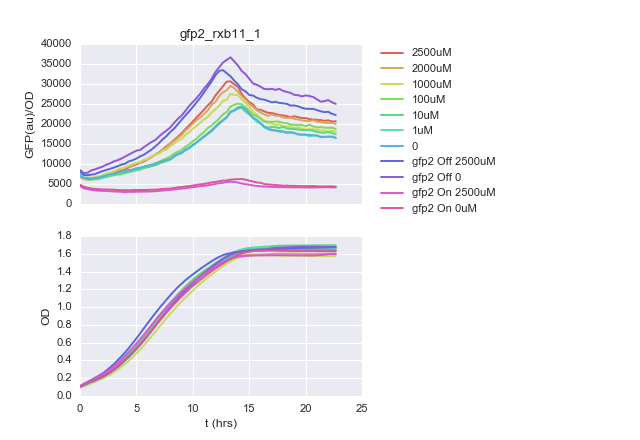

In [148]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

wells = list()
num = 3
for c in string.ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['A4','G4','A5','G5']
labels = ['2500uM', '2000uM','1000uM','100uM','10uM','1uM','0','gfp2 Off 2500uM','gfp2 Off 0','gfp2 On 2500uM', 'gfp2 On 0uM']
wells_labels = zip(wells, labels)
color=iter(sns.color_palette('hls',len(wells)))

for well, label in wells_labels:
    c = next(color)
    shrink_factor = 0.95
    box_ax1 = ax1.get_position()
    ax1.set_position([box_ax1.x0, box_ax1.y0, box_ax1.width*shrink_factor, box_ax1.height])
    ax1.plot(t, nGFP.loc[:,well],color = c,label = label)
    box_ax2 = ax2.get_position()
    ax2.set_position([box_ax2.x0, box_ax2.y0, box_ax2.width*shrink_factor, box_ax2.height])
    ax2.plot(t, OD.loc[:,well],color = c,label = label)
    
ax1.set_title(strains[num-1])
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_ylabel('GFP(au)/OD')
ax2.set_ylabel('OD')
ax2.set_xlabel('t (hrs)')





In [89]:
#At time t plot eGFP/OD level for all theophylline concentrations. 
t_low = 11.95
t_check = (t>t_low)
#finds index of first time value above t_low
t_ind = [ind for ind,val in enumerate(t_check) if val==True][0]

t_slice = nGFP.loc[t_ind,]

concentrations = ['2500uM', '2000uM','1000uM','100uM','10uM','1uM','0']
exp_rows = [item for item in string.ascii_uppercase[0:7]]
conc_dict = dict(zip(exp_rows,concentrations))


exp_cols = [str(item) for item in range(1,8)]
strain_dict = dict(zip(exp_cols,strains))

theo_data = []
for exp_row in list(reversed(exp_rows)): 
    for exp_col in exp_cols:
        well = exp_row+exp_col
        well_nGFP = t_slice[well]
        theo_data.append((well,strain_dict[exp_col],conc_dict[exp_row],well_nGFP))

exp_wells, exp_strains, exp_concs, exp_nGFPs = zip(*theo_data)
exp_dict = {"well": exp_wells, "strain":exp_strains, "theophylline_concentration":exp_concs , "nGFP":exp_nGFPs}
exp_data = pd.DataFrame.from_dict(exp_dict)
#kl_promoters = kl_promoters[["kl_gene","refseq","loc","strand","prom_seq","gene_seq"]]
exp_data.set_index("well", inplace = True)

<IPython.core.display.Javascript object>


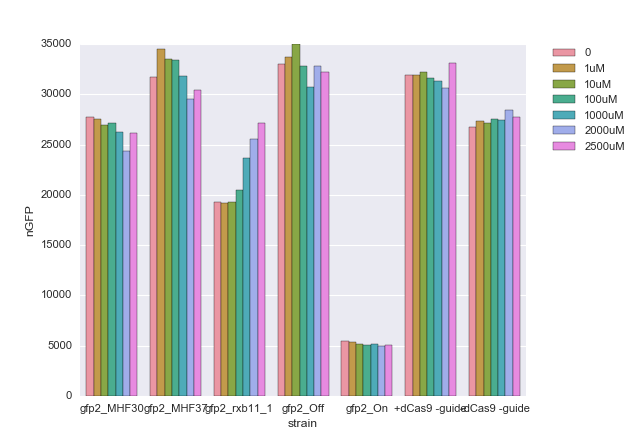

In [90]:
fig, ax = plt.subplots()
ax = sns.barplot(x="strain", y="nGFP", hue="theophylline_concentration", data=exp_data)
shrink_factor = 0.90
box_ax = ax.get_position()
ax.set_position([box_ax.x0, box_ax.y0, box_ax.width*shrink_factor, box_ax.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('nGFP')

In [103]:
#Was there a growth defect for Theophylline? 
#plot growth rate dependence on Theophylline for all conditions
#Chose time 1 and 5 to be linear range.
t_low = 1.0 
t_high = 5.0
t_check = (t>t_low)*(t<t_high)
#finds indices of all time values above t_low
t_inds = [ind for ind,val in enumerate(t_check) if val==True]

OD_linear_range = OD.loc[t_inds,]
t_linear_range = t[t_inds]



0.32295383419455542

In [104]:
concentrations = ['2500uM', '2000uM','1000uM','100uM','10uM','1uM','0']
exp_rows = [item for item in string.ascii_uppercase[0:7]]
conc_dict = dict(zip(exp_rows,concentrations))


exp_cols = [str(item) for item in range(1,8)]
strain_dict = dict(zip(exp_cols,strains))

theo_data = []
for exp_row in list(reversed(exp_rows)): 
    for exp_col in exp_cols:
        well = exp_row+exp_col
        #For each condition find growth rate
        log_od = np.log(OD_linear_range[well])
        lst_sqrs_mat = np.vstack([t_linear_range, np.ones(len(t_linear_range))]).T
        slope, intercept = np.linalg.lstsq(lst_sqrs_mat, log_od)[0]
        theo_data.append((well,strain_dict[exp_col],conc_dict[exp_row],slope))

exp_wells, exp_strains, exp_concs, exp_slopes = zip(*theo_data)
exp_dict = {"well": exp_wells, "strain":exp_strains, "theophylline_concentration":exp_concs , "growth_rate":exp_slopes}
exp_data = pd.DataFrame.from_dict(exp_dict)
#kl_promoters = kl_promoters[["kl_gene","refseq","loc","strand","prom_seq","gene_seq"]]
exp_data.set_index("well", inplace = True)

<IPython.core.display.Javascript object>


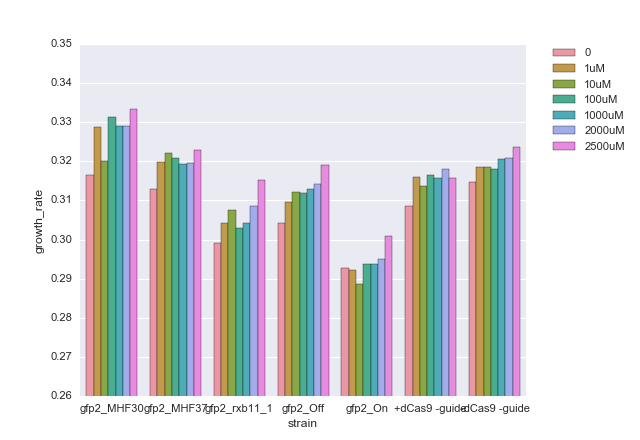

(0.26, 0.35)

In [108]:
fig, ax = plt.subplots()
ax = sns.barplot(x="strain", y="growth_rate", hue="theophylline_concentration", data=exp_data)
shrink_factor = 0.90
box_ax = ax.get_position()
ax.set_position([box_ax.x0, box_ax.y0, box_ax.width*shrink_factor, box_ax.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('growth_rate')
ax.set_ylim([0.26,0.35])

<IPython.core.display.Javascript object>


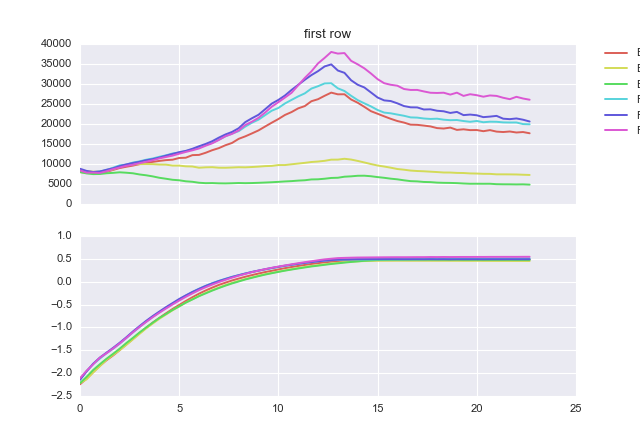

In [150]:
#Second set of experiments
# Is there a fluorescence dependence on Estradiol (look at GFP for on strain)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

wells = ['B8','B9','B10','F8','F9','F10'] #,'E8','E9','E10'] 
# list()
# num = 6
# for c in string.ascii_uppercase[0:7]:
#     wells.append(c + str(num))
    
# wells = wells + ['A4','A5','G4','G5']

color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, np.log(OD.loc[:,well]),color = c,label = well)
    
ax1.set_title('first row')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [116]:
#First plot is the theophylline dose experiment
#concs = [2500, 2000, 1000, 100, 10, 1, 0]
#ic = range(len(concs))
strains = ['gfp1_on','gfp2_on','rfp1_on','rfp2_on','gfp1_off','gfp2_off','rfp1_off','rfp2_off','+Cas9 -guide','-Cas9 -guide', 'gfp2 MHF30 0 theo', 'gfp2 MHF30 2.5mM theo']
concentrations = ['0', '3.91nM','125nM']


In [141]:
#At time t plot eGFP/OD level for all est
t_low = 11.95
t_check = (t>t_low)
#finds index of first time value above t_low
t_ind = [ind for ind,val in enumerate(t_check) if val==True][0]

t_slice = nGFP.loc[t_ind,]

#growth rate
t_low = 1.0 
t_high = 5.0
t_check = (t>t_low)*(t<t_high)
#finds indices of all time values above t_low
t_inds = [ind for ind,val in enumerate(t_check) if val==True]

OD_linear_range = OD.loc[t_inds,]
t_linear_range = t[t_inds]

est_data = []
onoff_cols = [8,9,10]
onoff_rows = [item for item in string.ascii_uppercase[0:8]]
for col,conc in zip(onoff_cols,concentrations):
    for row,strain in zip(onoff_rows,strains[0:8]):
        well = row+str(col)
        well_nGFP = t_slice[well]
        #For each condition find growth rate
        log_od = np.log(OD_linear_range[well])
        lst_sqrs_mat = np.vstack([t_linear_range, np.ones(len(t_linear_range))]).T
        slope, intercept = np.linalg.lstsq(lst_sqrs_mat, log_od)[0]
        est_data.append((well,strain,conc,well_nGFP,slope))

est_data_last_columns = [('A11',strains[8],concentrations[0]),
                        ('B11',strains[9],concentrations[0]),
                        ('C11',strains[10],concentrations[0]),
                        ('D11',strains[11],concentrations[0]),
                        ('A12',strains[8],concentrations[1]),
                        ('B12',strains[9],concentrations[1]),
                        ('C12',strains[10],concentrations[1]),
                        ('D12',strains[11],concentrations[1]),
                        ('E11',strains[8],concentrations[2]),
                        ('F11',strains[9],concentrations[2]),
                        ('G11',strains[10],concentrations[2]),
                        ('H11',strains[11],concentrations[2])]

for well,strain,conc in est_data_last_columns: 
    well_nGFP = t_slice[well]
    #For each condition find growth rate
    log_od = np.log(OD_linear_range[well])
    lst_sqrs_mat = np.vstack([t_linear_range, np.ones(len(t_linear_range))]).T
    slope, intercept = np.linalg.lstsq(lst_sqrs_mat, log_od)[0]
    est_data.append((well,strain,conc,well_nGFP,slope))

exp_wells, exp_strains, exp_concs, exp_nGFPs, exp_slope = zip(*est_data)
exp_dict = {"well": exp_wells, "strain":exp_strains, "estradiol_conc":exp_concs , "nGFP":exp_nGFPs, "growth_rate":exp_slope}
exp_data = pd.DataFrame.from_dict(exp_dict)
#kl_promoters = kl_promoters[["kl_gene","refseq","loc","strand","prom_seq","gene_seq"]]
exp_data.set_index("well", inplace = True)


In [142]:
exp_data_subset = exp_data.loc[~exp_data['strain'].isin(['rfp1_on','rfp2_on','rfp1_off','rfp2_off'])]

,estradiol_conc,growth_rate,nGFP,strain
well,,,,
A8,0,0.333687,28928.712610,gfp1_on
B8,0,0.337949,26198.721364,gfp2_on
E8,0,0.318555,30149.023638,gfp1_off
F8,0,0.328115,29448.708109,gfp2_off
A9,3.91nM,0.328012,20429.581654,gfp1_on
B9,3.91nM,0.326450,10617.034612,gfp2_on
E9,3.91nM,0.313936,NaN,gfp1_off
F9,3.91nM,0.326665,33213.509019,gfp2_off
A10,125nM,0.303751,14404.071822,gfp1_on


<IPython.core.display.Javascript object>


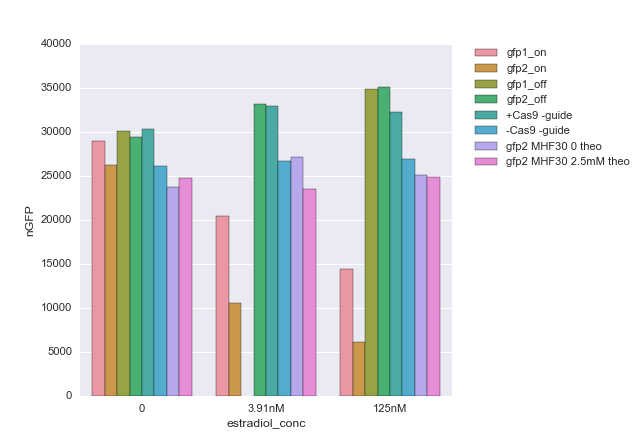

In [139]:
fig, ax = plt.subplots()
ax = sns.barplot(x="estradiol_conc", y="nGFP", hue="strain", data=exp_data_subset)
shrink_factor = 0.75
box_ax = ax.get_position()
ax.set_position([box_ax.x0, box_ax.y0, box_ax.width*shrink_factor, box_ax.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('nGFP')

<IPython.core.display.Javascript object>


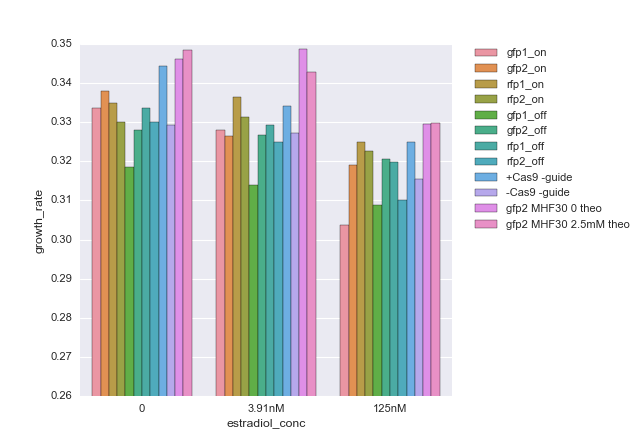

(0.26, 0.35)

In [143]:
fig, ax = plt.subplots()
ax = sns.barplot(x="estradiol_conc", y="growth_rate", hue="strain", data=exp_data)
shrink_factor = 0.75
box_ax = ax.get_position()
ax.set_position([box_ax.x0, box_ax.y0, box_ax.width*shrink_factor, box_ax.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('growth_rate')
ax.set_ylim([0.26,0.35])

In [ ]:
# Is there a growth dependence on Estradiol - does it vary for on v.s. off strain - is the +/- theophylline strain in the middle?

In [41]:
concs = [2500, 2000, 1000, 100, 10, 1, 0]
ic = range(len(concs))

GFPtitles = ['gfp2_MHF30','gfp1_MHF37','gfp1_rxb11_1', 'gfp2_MHF30','gfp2_MHF37','gfp2_rxb11_1']
RFPtitles = ['rfp1_MHF30','rfp1_MHF37','rfp1_rxb11_1','rfp2_MHF30','rfp2_MHF37','rfp2_rxb11_1']

titles = GFPtitles + RFPtitles

In [14]:
OD = d['OD']
sfGFP = d['sfGFP']
mRFP = d['mRFP']

nGFP = pd.DataFrame(index = sfGFP.index.tolist(), columns = sfGFP.columns.tolist())
nRFP = pd.DataFrame(index = mRFP.index.tolist(), columns = mRFP.columns.tolist())

for i in range(len(sfGFP)):
    for j in range(len(sfGFP.iloc[i,:])):
        try: 
            nGFP.iloc[i,j] = sfGFP.iloc[i,j]/OD.iloc[i,j]
        except TypeError:
            nGFP.iloc[i,j] = np.nan
            
for i in range(len(mRFP)):
    for j in range(len(mRFP.iloc[i,:])):
        try: 
            nRFP.iloc[i,j] = mRFP.iloc[i,j]/OD.iloc[i,j]
        except TypeError:
            nRFP.iloc[i,j] = np.nan

In [43]:
[twostep, maxind, maxgrowth, maxOD] = computegrowthrate(OD,t)

In [44]:
nGFP_exp = exponentialvalues(maxind,nGFP)
nRFP_exp = exponentialvalues(maxind,nRFP)

In [45]:
exponentialvalues(maxind,OD)

array([[ 0.34333333,  0.33246667,  0.38073333,  0.26293333,  0.3533    ,
         0.30443333,  0.27423333,  0.37193333,  0.3235    ,  0.33203333,
         0.33713333,  0.16686667],
       [ 0.36736667,  0.20563333,  0.21923333,  0.29606667,  0.25326667,
         0.17916667,  0.25493333,  0.29113333,  0.30806667,  0.1853    ,
         0.29886667,  0.18376667],
       [ 0.16646667,  0.1769    ,  0.17143333,  0.16633333,  0.2658    ,
         0.19406667,  0.1842    ,  0.168     ,  0.17863333,  0.1816    ,
         0.1988    ,  0.1941    ],
       [ 0.3427    ,  0.23693333,  0.24563333,  0.19496667,  0.43243333,
         0.30886667,  0.13836667,  0.324     ,  0.37103333,  0.19793333,
         0.2052    ,  0.21826667],
       [ 0.3013    ,  0.17233333,  0.2215    ,  0.2306    ,  0.28306667,
         0.17793333,  0.20633333,  0.22696667,  0.18966667,  0.18283333,
         0.22596667,  0.21626667],
       [ 0.16823333,  0.5184    ,  0.3237    ,  0.17896667,  0.29313333,
         0.19316667,  

In [62]:
OD_40 = tptoplate(40,OD)
GFP_40 = tptoplate(40,nGFP)
RFP_40 = tptoplate(40,nRFP)

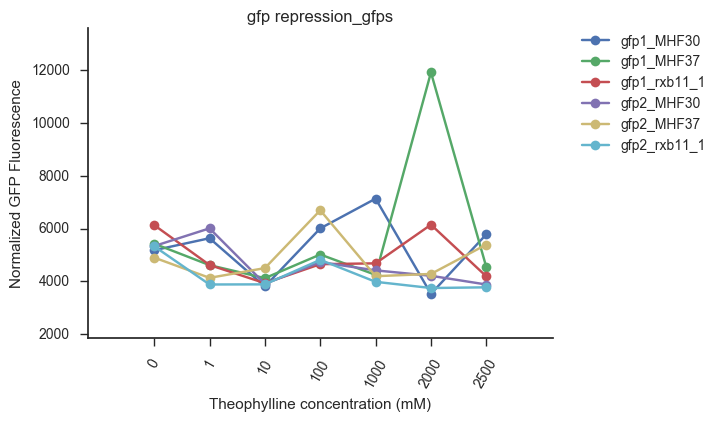

In [46]:
#Compare nGFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(GFPtitles)):
    plt.plot(ic,nGFP_exp[:7,i],'o-',label=GFPtitles[i])
    
    plt.title('gfp repression_gfps')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression' + '.svg'
dest = date + 'gfprepression' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

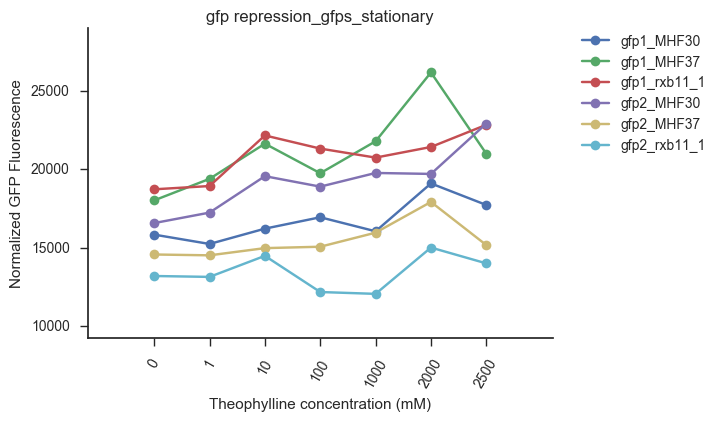

In [65]:
#Compare nGFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(GFPtitles)):
    plt.plot(ic,GFP_40[:7,i],'o-',label=GFPtitles[i])
    
    plt.title('gfp repression_gfps_stationary')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression_tp40' + '.svg'
dest = date + 'gfprepression_tp40' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

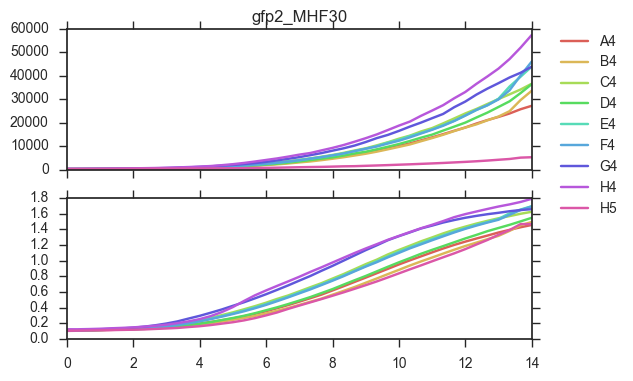

In [85]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

wells = list()
num = 4
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H4','H5']

color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, sfGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)
    
ax1.set_title('gfp2_MHF30')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


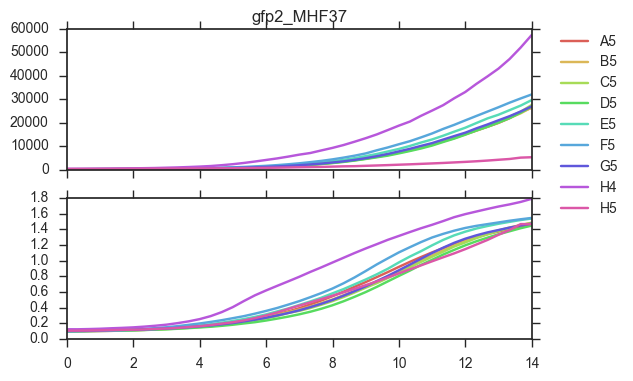

In [86]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

wells = list()
num = 5
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H4','H5']

color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, sfGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)
    
ax1.set_title('gfp2_MHF37')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


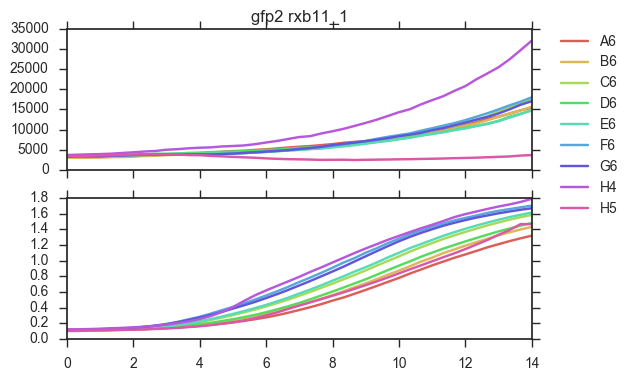

In [83]:
from string import ascii_uppercase

wells = list()
num = 6
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H4','H5']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp2 rxb11_1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

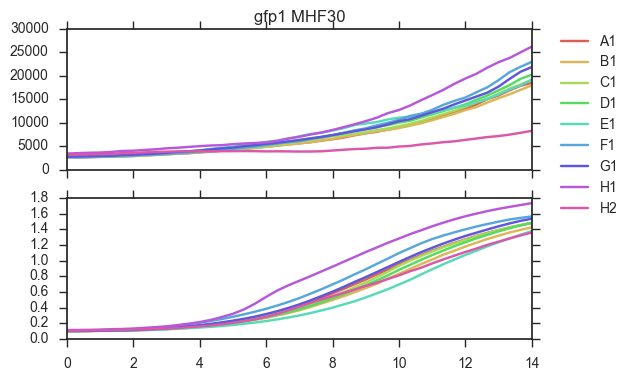

In [87]:
from string import ascii_uppercase

wells = list()
num = 1
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H1','H2']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp1 MHF30')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

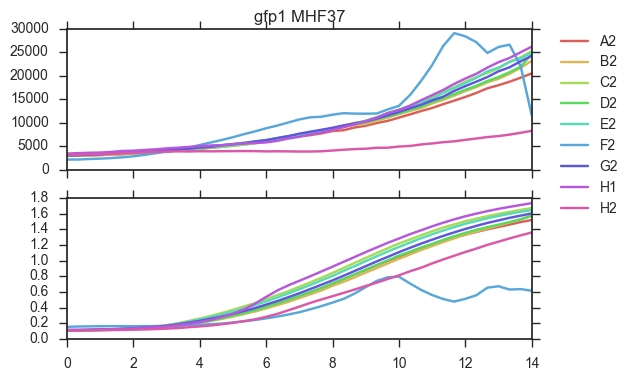

In [88]:
from string import ascii_uppercase

wells = list()
num = 2
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H1','H2']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp1 MHF37')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

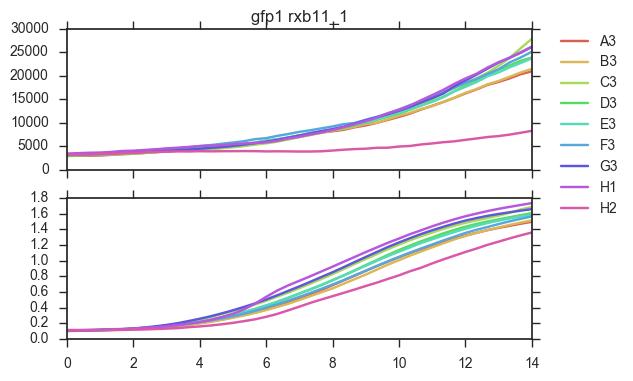

In [89]:
from string import ascii_uppercase

wells = list()
num = 3
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H1','H2']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp1 rxb11_1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

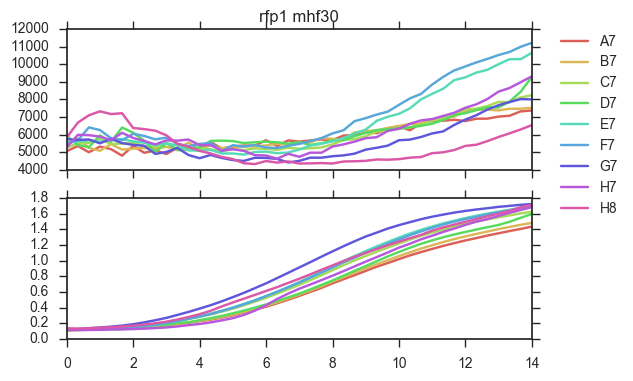

In [100]:
from string import ascii_uppercase

wells = list()
num = 7
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H7','H8']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nRFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('rfp1 mhf30')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

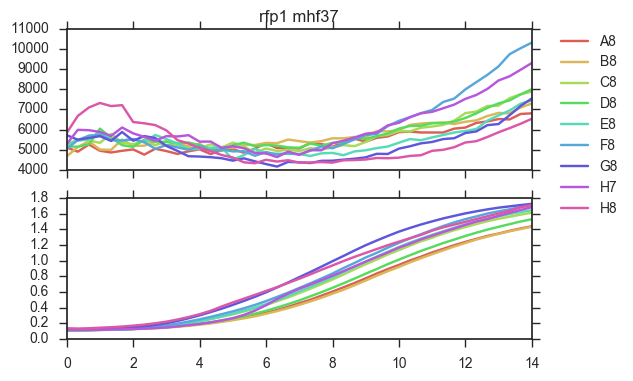

In [101]:
from string import ascii_uppercase

wells = list()
num = 8
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H7','H8']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nRFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('rfp1 mhf37')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

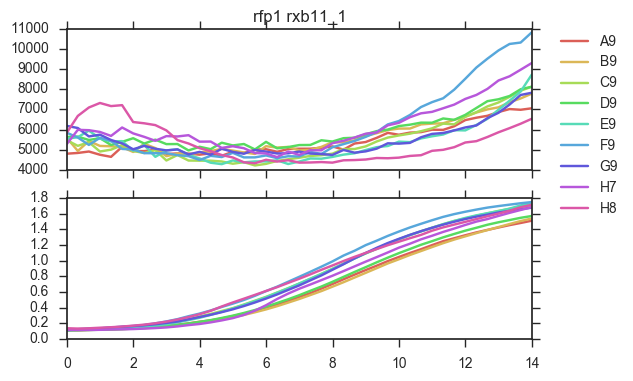

In [102]:
from string import ascii_uppercase

wells = list()
num = 9
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H7','H8']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nRFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('rfp1 rxb11_1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

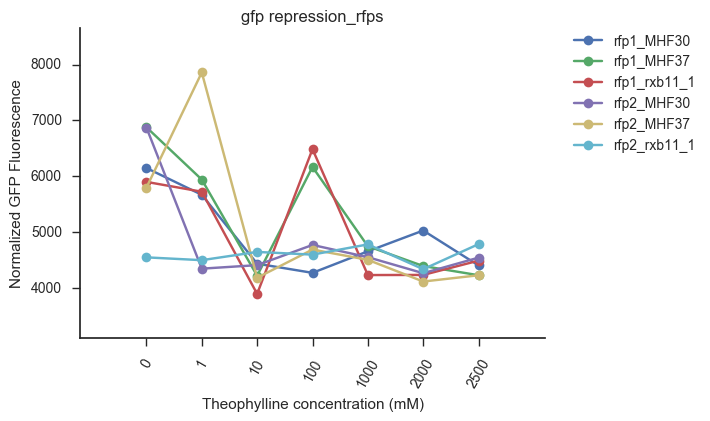

In [47]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,nGFP_exp[:7,i+6],'o-',label=RFPtitles[i])
    
    plt.title('gfp repression_rfps')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression_rfps' + '.svg'
dest = date + 'gfprepression_rfps' + '.png'


sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

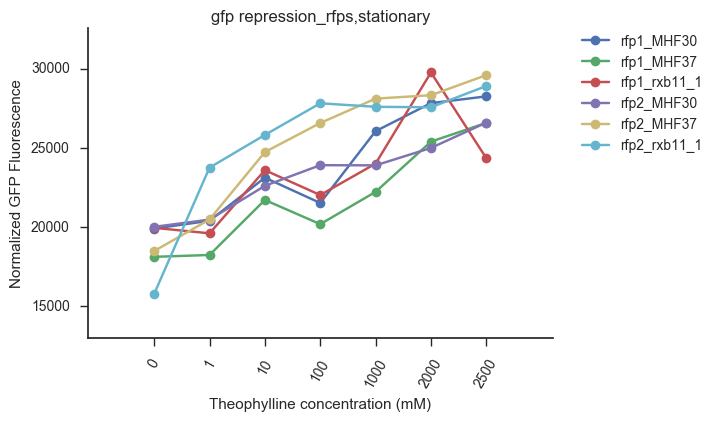

In [66]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,GFP_40[:7,i+6],'o-',label=RFPtitles[i])
    
    plt.title('gfp repression_rfps,stationary')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression_rfps_tp40' + '.svg'
dest = date + 'gfprepression_rfps_tp40' + '.png'


sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

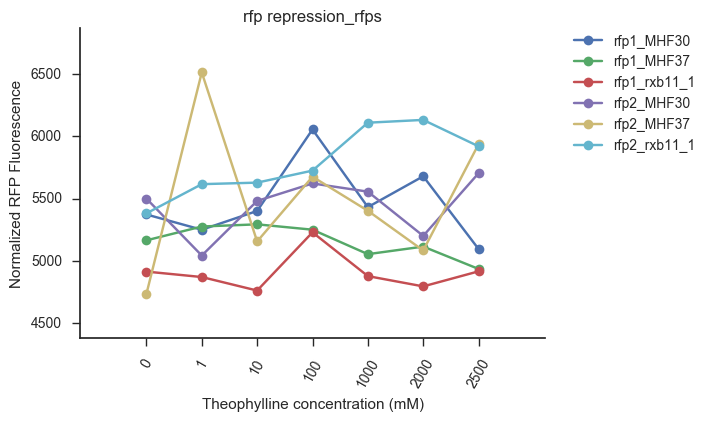

In [48]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,nRFP_exp[:7,i+6],'o-',label=RFPtitles[i])
    
    plt.title('rfp repression_rfps')
    plt.ylabel('Normalized RFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfprepression' + '.svg'
dest = date + 'rfprepression' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

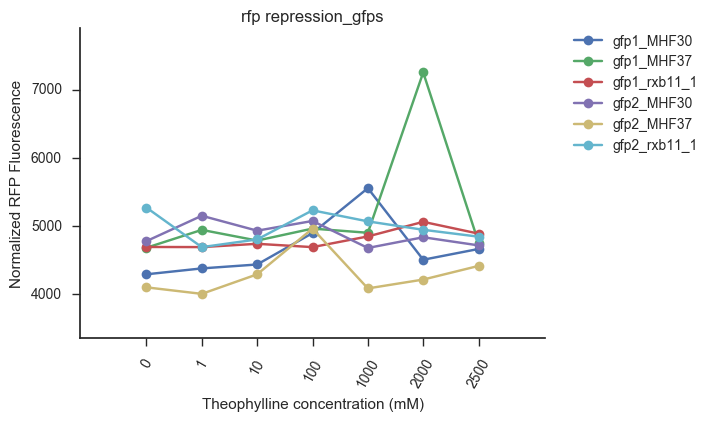

In [49]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,nRFP_exp[:7,i],'o-',label=GFPtitles[i])
    
    plt.title('rfp repression_gfps')
    plt.ylabel('Normalized RFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfprepression_gfps' + '.svg'
dest = date + 'rfprepression_gfps' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

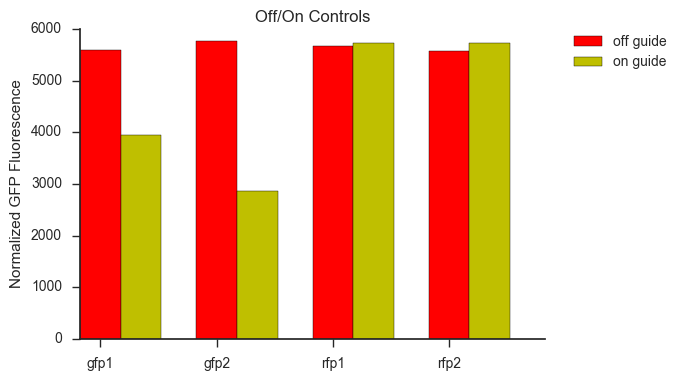

In [94]:
#Plot controls

N = 4
gfp_off = [nGFP_exp[-1,0],nGFP_exp[-1,3],nGFP_exp[-1,6],nGFP_exp[-1,9]]
gfp_on = [nGFP_exp[-1,1],nGFP_exp[-1,4],nGFP_exp[-1,7],nGFP_exp[-1,10]]

rfp_off = [nRFP_exp[-1,0],nRFP_exp[-1,3],nRFP_exp[-1,6],nRFP_exp[-1,9]]
rfp_on = [nRFP_exp[-1,1],nRFP_exp[-1,4],nRFP_exp[-1,7],nRFP_exp[-1,10]]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, gfp_off, width, color='r')
rects2 = ax.bar(ind + width, gfp_on, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized GFP Fluorescence')
ax.set_title('Off/On Controls')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfp_controls' + '.svg'
dest = date + 'gfp_controls' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

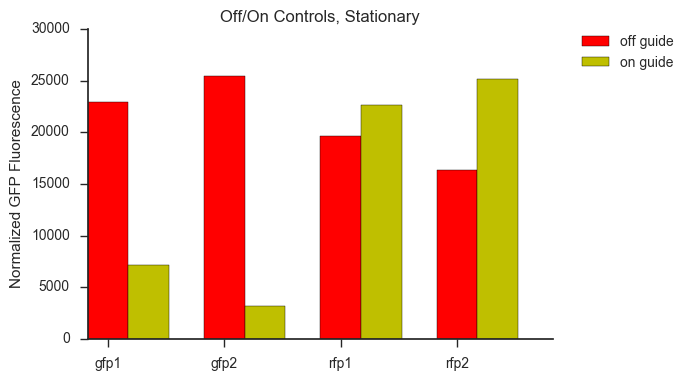

In [96]:
#Plot controls

N = 4
gfp_off_40 = [GFP_40[-1,0],GFP_40[-1,3],GFP_40[-1,6],GFP_40[-1,9]]
gfp_on_40 = [GFP_40[-1,1],GFP_40[-1,4],GFP_40[-1,7],GFP_40[-1,10]]

rfp_off_40 = [RFP_40[-1,0],RFP_40[-1,3],RFP_40[-1,6],RFP_40[-1,9]]
rfp_on_40 = [RFP_40[-1,1],RFP_40[-1,4],RFP_40[-1,7],RFP_40[-1,10]]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, gfp_off_40, width, color='r')
rects2 = ax.bar(ind + width, gfp_on_40, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized GFP Fluorescence')
ax.set_title('Off/On Controls, Stationary')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfp_controls_tp40' + '.svg'
dest = date + 'gfp_controls_tp40' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

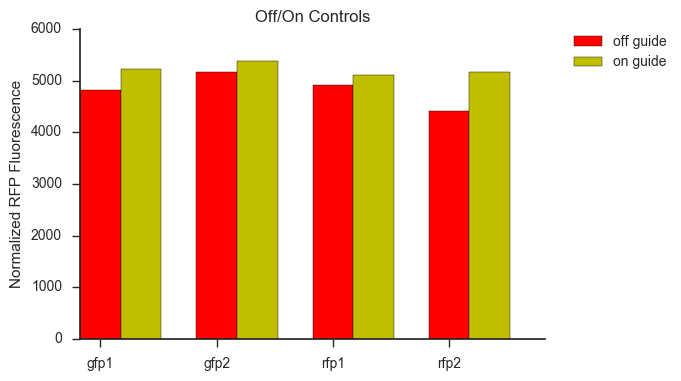

In [97]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rfp_off, width, color='r')
rects2 = ax.bar(ind + width, rfp_on, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized RFP Fluorescence')
ax.set_title('Off/On Controls')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfp_controls' + '.svg'
dest = date + 'rfp_controls' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

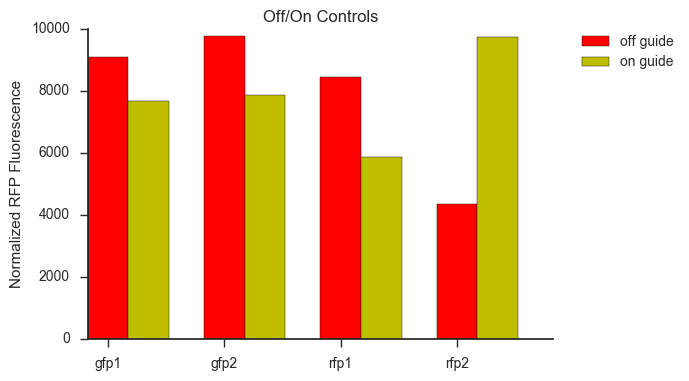

In [98]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rfp_off_40, width, color='r')
rects2 = ax.bar(ind + width, rfp_on_40, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized RFP Fluorescence')
ax.set_title('Off/On Controls')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfp_controls' + '.svg'
dest = date + 'rfp_controls' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

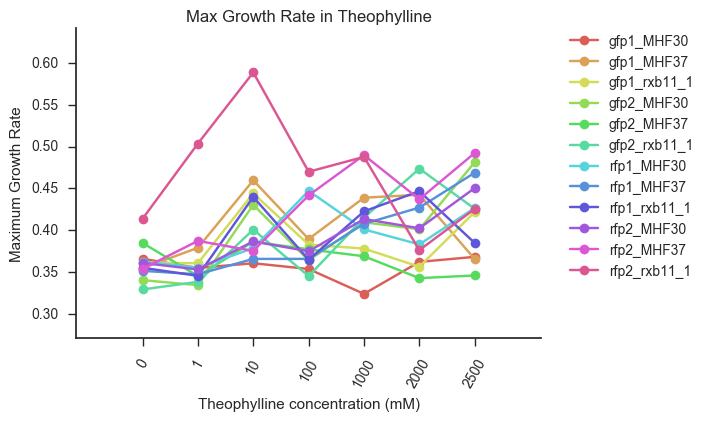

In [53]:
#Compare max growth rate for growth in theophylline

plt.figure()
sns.set_palette("hls", 12)

for i in range(len(titles)):
    plt.plot(ic,maxgrowth[:7,i],'o-',label=titles[i])
    
    plt.title('Max Growth Rate in Theophylline')
    plt.ylabel('Maximum Growth Rate')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation=60)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'igRNA_GR' + '.svg'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

ValueError: x and y must have same first dimension

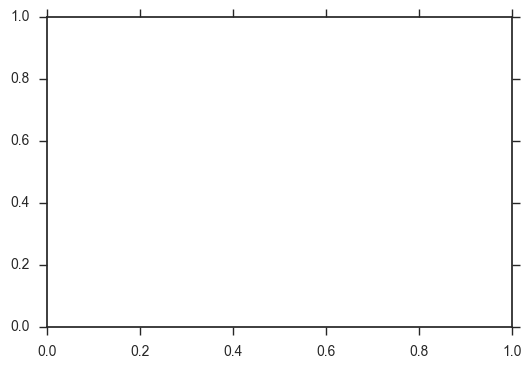

In [54]:
#Compare max OD for growth in theophylline

plt.figure()

for i in range(len(titles)):
    plt.plot(ic,maxOD[i,:8],'o-',label=titles[i])
    
    plt.title('Max OD in Theophylline')
    plt.ylabel('Maximum OD')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation=60)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'igRNA_GR' + '.svg'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

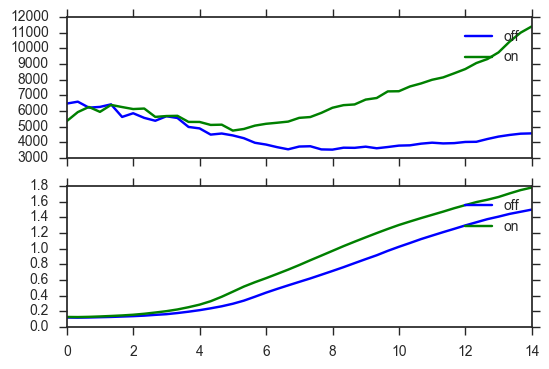

In [58]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nRFP.loc[:,'H10'],'b',label = 'off')
ax1.plot(t, nRFP.loc[:,'H11'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H10'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H11'],'g',label = 'on')
ax1.legend()
ax2.legend()


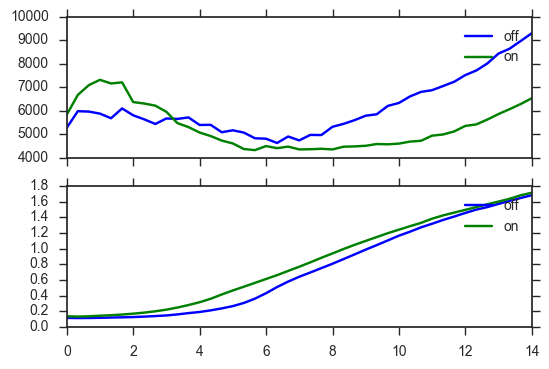

In [59]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nRFP.loc[:,'H7'],'b',label = 'off')
ax1.plot(t, nRFP.loc[:,'H8'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H7'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H8'],'g',label = 'on')
ax1.legend()
ax2.legend()


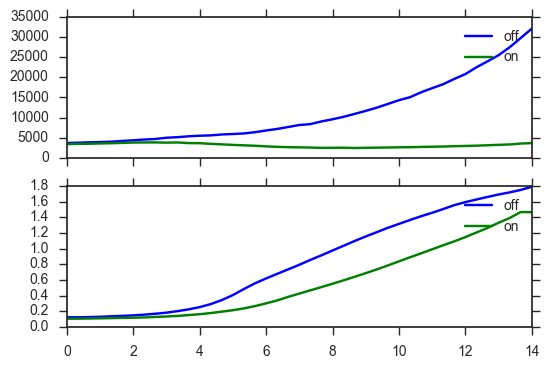

In [60]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nGFP.loc[:,'H4'],'b',label = 'off')
ax1.plot(t, nGFP.loc[:,'H5'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H4'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H5'],'g',label = 'on')
ax1.legend()
ax2.legend()


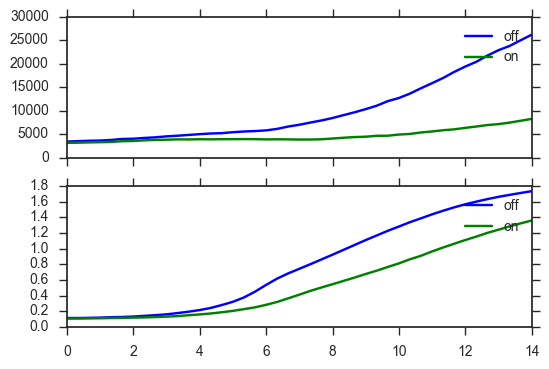

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nGFP.loc[:,'H1'],'b',label = 'off')
ax1.plot(t, nGFP.loc[:,'H2'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H1'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H2'],'g',label = 'on')
ax1.legend()
ax2.legend()


In [28]:
maxind

array([ 19.,  16.,  18.,  15.,  20.,  19.,  14.,  19.,  16.,  17.,  16.,
         9.,  21.,  12.,  13.,  17.,  17.,  12.,  13.,  17.,  16.,  10.,
        17.,   8.,  12.,   9.,   9.,   9.,  18.,  11.,   8.,   9.,   8.,
         9.,   8.,   8.,  20.,  13.,  13.,  12.,  24.,  17.,   6.,  17.,
        17.,  10.,   9.,   8.,  21.,   9.,  12.,  12.,  17.,  10.,   9.,
        12.,   9.,   9.,   9.,   8.,  10.,  47.,  16.,  10.,  16.,   9.,
         9.,  10.,   9.,   9.,   8.,   6.,  19.,  11.,  10.,   9.,  21.,
         9.,   8.,  10.,  10.,   9.,   6.,   8.,  16.,  18.,  46.,  14.,
        48.,  44.,  17.,  12.,   3.,  15.,  13.,   0.])

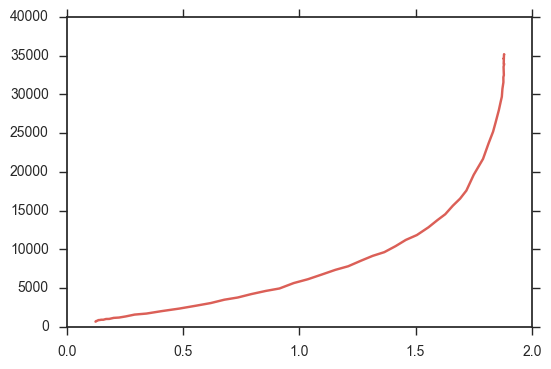

In [24]:
plt.plot(OD.loc[:,'H4'],mRFP.loc[:,'H4'])

In [25]:
sfGFP

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,271.0,325.0,305.0,316.0,256.0,320.0,389.0,333.0,349.0,364.0,...,201.0,456.0,359.0,209.0,391.0,550.0,200.0,428.0,509.0,194.0
1,265.0,326.0,314.0,317.0,254.0,317.0,403.0,337.0,354.0,372.0,...,204.0,465.0,367.0,208.0,396.0,551.0,206.0,424.0,501.0,199.0
2,275.0,346.0,328.0,337.0,265.0,333.0,427.0,345.0,373.0,391.0,...,206.0,487.0,377.0,207.0,406.0,577.0,208.0,448.0,524.0,195.0
3,290.0,367.0,345.0,356.0,273.0,349.0,447.0,364.0,396.0,410.0,...,205.0,510.0,392.0,211.0,421.0,619.0,207.0,468.0,560.0,197.0
4,299.0,395.0,372.0,380.0,282.0,364.0,485.0,388.0,420.0,432.0,...,206.0,546.0,410.0,215.0,447.0,667.0,208.0,495.0,593.0,195.0
5,313.0,418.0,401.0,405.0,298.0,382.0,527.0,406.0,451.0,458.0,...,209.0,593.0,429.0,208.0,480.0,730.0,209.0,525.0,642.0,201.0
6,334.0,465.0,437.0,433.0,320.0,413.0,574.0,447.0,497.0,503.0,...,205.0,644.0,449.0,211.0,505.0,799.0,211.0,576.0,711.0,200.0
7,360.0,517.0,485.0,482.0,344.0,444.0,649.0,488.0,553.0,555.0,...,200.0,715.0,465.0,211.0,550.0,885.0,211.0,629.0,801.0,198.0
8,393.0,574.0,538.0,532.0,362.0,478.0,722.0,533.0,615.0,619.0,...,205.0,790.0,491.0,210.0,600.0,1019.0,211.0,684.0,892.0,197.0
9,437.0,654.0,610.0,611.0,408.0,523.0,828.0,612.0,703.0,704.0,...,208.0,910.0,505.0,212.0,665.0,1148.0,208.0,755.0,1010.0,196.0
